In [1]:
# importing required libraries
import pandas as pd
import re
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

In [2]:
# Reading the dataset
df = pd.read_csv('diabetic_data.csv')
df.head(3)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO


In [3]:
# Function to calculate average of age range
def calculate_average(age_range):
    # Extract lower and upper bounds
    lower, upper = map(int, re.findall(r'\d+', age_range))
    return int((lower + upper) / 2)

df['average_age'] = df['age'].apply(calculate_average)


df['average_age'].head(3)

0     5
1    15
2    25
Name: average_age, dtype: int64

In [4]:
# encoding gender
encoder = OrdinalEncoder()
df['gender'] = encoder.fit_transform(df[['gender']])
print(f'Gender: {df["gender"].unique()}')

# encoding in insulin
encoder = OrdinalEncoder()
df['insulin'] = encoder.fit_transform(df[['insulin']])
print(f'Insulin: {df["insulin"].unique()}')

# encoding in diabetesMed
encoder = OrdinalEncoder()
df['diabetesMed'] = encoder.fit_transform(df[['diabetesMed']])
print(f'Diabetes Med: {df["diabetesMed"].unique()}')


Gender: [0. 1. 2.]
Insulin: [1. 3. 2. 0.]
Diabetes Med: [0. 1.]


2. Dealing with Duplicate Records

In [5]:
# drop NA values
df.dropna()

# removing the duplicates
df.drop_duplicates(['patient_nbr'], keep= 'first', inplace=True)

 Replace (?)

In [6]:
# Count the number of '?' and 'V#' values in each column
count_question_marks_diag_1 = df['diag_1'].astype(str).str.count(r'\?').sum()
count_question_marks_diag_2 = df['diag_2'].astype(str).str.count(r'\?').sum()
count_question_marks_diag_3 = df['diag_3'].astype(str).str.count(r'\?').sum()

count_v_values_diag_1 = df['diag_1'].astype(str).str.count(r'^V\d+$').sum()
count_v_values_diag_2 = df['diag_2'].astype(str).str.count(r'^V\d+$').sum()
count_v_values_diag_3 = df['diag_3'].astype(str).str.count(r'^V\d+$').sum()

count_e_values_diag_1 = df['diag_1'].astype(str).str.count(r'^E\d+$').sum()
count_e_values_diag_2 = df['diag_2'].astype(str).str.count(r'^E\d+$').sum()
count_e_values_diag_3 = df['diag_3'].astype(str).str.count(r'^E\d+$').sum()

print("Number of '?' values in diag_1:", count_question_marks_diag_1)
print("Number of '?' values in diag_2:", count_question_marks_diag_2)
print("Number of '?' values in diag_3:", count_question_marks_diag_3)
print("Number of 'V#' values in diag_1:", count_v_values_diag_1)
print("Number of 'V#' values in diag_2:", count_v_values_diag_2)
print("Number of 'V#' values in diag_3:", count_v_values_diag_3)
print("Number of 'E#' values in diag_1:", count_e_values_diag_1)
print("Number of 'E#' values in diag_2:", count_e_values_diag_2)
print("Number of 'E#' values in diag_3:", count_e_values_diag_3)

Number of '?' values in diag_1: 11
Number of '?' values in diag_2: 294
Number of '?' values in diag_3: 1225
Number of 'V#' values in diag_1: 927
Number of 'V#' values in diag_2: 1227
Number of 'V#' values in diag_3: 2604
Number of 'E#' values in diag_1: 1
Number of 'E#' values in diag_2: 573
Number of 'E#' values in diag_3: 937


In [7]:
# Replace '?' and 'V#' values with NaN for specified columns
df[['diag_1', 'diag_2', 'diag_3']] = df[['diag_1', 'diag_2', 'diag_3']].replace(['\?', '^V\d+$', '^E\d+$'], np.nan, regex=True)

# Convert columns to numeric
df[['diag_1', 'diag_2', 'diag_3']] = df[['diag_1', 'diag_2', 'diag_3']].astype(float)

# Calculate mean of each column
mean_diag_1 = df['diag_1'].mean()
mean_diag_2 = df['diag_2'].mean()
mean_diag_3 = df['diag_3'].mean()

# Replace NaN values with mean
df['diag_1'].fillna(mean_diag_1, inplace=True)
df['diag_2'].fillna(mean_diag_2, inplace=True)
df['diag_3'].fillna(mean_diag_3, inplace=True)

df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,average_age
0,2278392,8222157,Caucasian,0.0,[0-10),?,6,25,1,1,...,1.0,No,No,No,No,No,No,0.0,NO,5
1,149190,55629189,Caucasian,0.0,[10-20),?,1,1,7,3,...,3.0,No,No,No,No,No,Ch,1.0,>30,15
2,64410,86047875,AfricanAmerican,0.0,[20-30),?,1,1,7,2,...,1.0,No,No,No,No,No,No,1.0,NO,25
3,500364,82442376,Caucasian,1.0,[30-40),?,1,1,7,2,...,3.0,No,No,No,No,No,Ch,1.0,NO,35
4,16680,42519267,Caucasian,1.0,[40-50),?,1,1,7,1,...,2.0,No,No,No,No,No,Ch,1.0,NO,45


In [8]:
# exporting to newcsv
# df.to_excel('diabetic_data_cleaned.xlsx', index=False)

In [9]:
df.columns.sort_values()

Index(['A1Cresult', 'acarbose', 'acetohexamide', 'admission_source_id',
       'admission_type_id', 'age', 'average_age', 'change', 'chlorpropamide',
       'citoglipton', 'diabetesMed', 'diag_1', 'diag_2', 'diag_3',
       'discharge_disposition_id', 'encounter_id', 'examide', 'gender',
       'glimepiride', 'glimepiride-pioglitazone', 'glipizide',
       'glipizide-metformin', 'glyburide', 'glyburide-metformin', 'insulin',
       'max_glu_serum', 'medical_specialty', 'metformin',
       'metformin-pioglitazone', 'metformin-rosiglitazone', 'miglitol',
       'nateglinide', 'num_lab_procedures', 'num_medications',
       'num_procedures', 'number_diagnoses', 'number_emergency',
       'number_inpatient', 'number_outpatient', 'patient_nbr', 'payer_code',
       'pioglitazone', 'race', 'readmitted', 'repaglinide', 'rosiglitazone',
       'time_in_hospital', 'tolazamide', 'tolbutamide', 'troglitazone',
       'weight'],
      dtype='object')

In [10]:
print(len(df[df['race'] == '?']))
df = df[df['race'] != '?']

# encoding in race
encoder = OrdinalEncoder()
df['race'] = encoder.fit_transform(df[['race']])

print(f'race: {df["race"].unique()}')
print(len(df[df['race'] == '?']))

1948
race: [2. 0. 4. 1. 3.]
0


In [11]:

# Define custom colors for each cluster
custom_palette = {
    0: '#1f77b4AF',  # blue
    1: '#9467bdFF',  # purple
    2: '#ffc800AF',  # yellow
    3: '#ff7f0eAF',  # orange
    4: '#2ca02cAF',  # green
    5: '#8c564bAF'   # brown
}

In [12]:
df_clustering = df[['diag_1', 'diag_2', 'diag_3', 'average_age', 'gender']].dropna()
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_clustering)
df_standardized

array([[-1.20154596e+00,  1.15346674e-03,  5.89802428e-04,
        -3.79496847e+00, -9.37009199e-01],
       [-1.07787958e+00, -1.04898147e+00, -9.32236847e-01,
        -3.16923296e+00, -9.37009199e-01],
       [ 7.49847507e-01, -1.04903793e+00,  5.89802428e-04,
        -2.54349746e+00, -9.37009199e-01],
       ...,
       [ 2.45965672e+00,  8.42362571e-01, -6.81169703e-02,
        -4.05554319e-02, -9.37009199e-01],
       [-9.99267666e-01, -2.41536307e+00, -6.46143104e-01,
         1.21091558e+00, -9.37009199e-01],
       [ 1.70084613e-01,  5.31834131e-01,  2.17392379e+00,
         5.85180075e-01,  1.06710215e+00]])

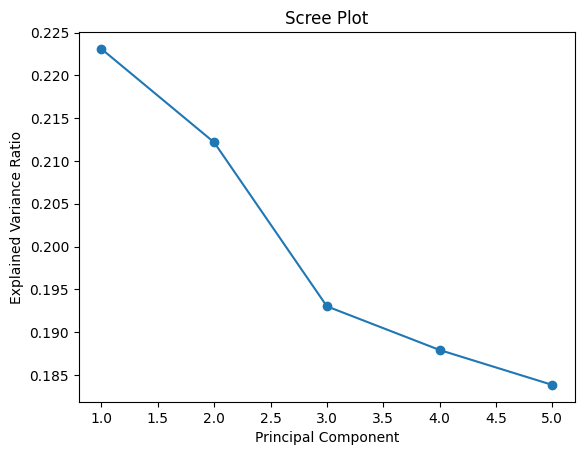

In [13]:
# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(df_standardized)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

In [14]:
# Choose the number of principal components based on the scree plot or cumulative explained variance
num_components = 3

# Retain only the selected number of principal components
pca_result_selected = pca_result[:, :num_components]

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=pca_result_selected, columns=[f'PC{i}' for i in range(1, num_components + 1)])

# Display the DataFrame with principal components
print("DataFrame with Principal Components:")
print(pca_df)

DataFrame with Principal Components:
            PC1       PC2       PC3
0     -2.253787  0.690831 -0.540299
1     -2.813103 -0.309952 -0.837968
2     -1.589423 -0.928636  0.350296
3     -2.681988  1.761397 -1.090101
4     -2.744908  0.533570 -0.632071
...         ...       ...       ...
69565  0.763553 -1.011949 -0.072500
69566  0.408478  0.044566  0.380807
69567  1.316125 -1.575320  1.609696
69568 -0.787680 -1.352503 -2.190943
69569  1.254626  1.684634  0.600589

[69570 rows x 3 columns]


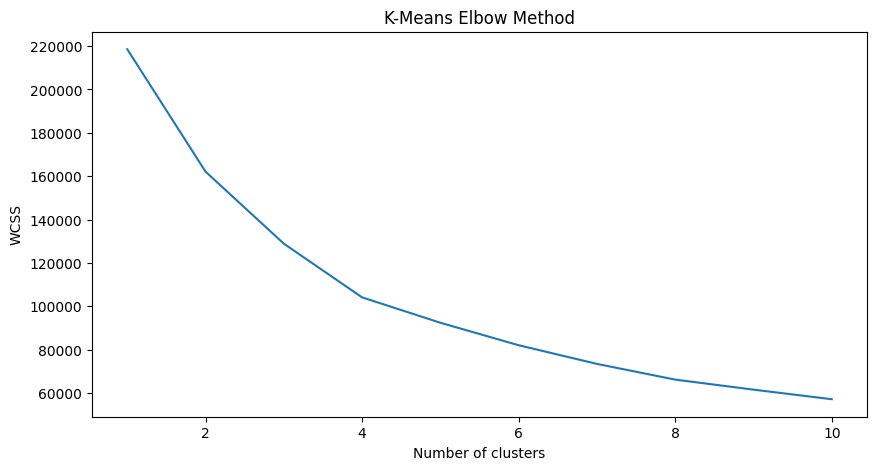

In [15]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('K-Means Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


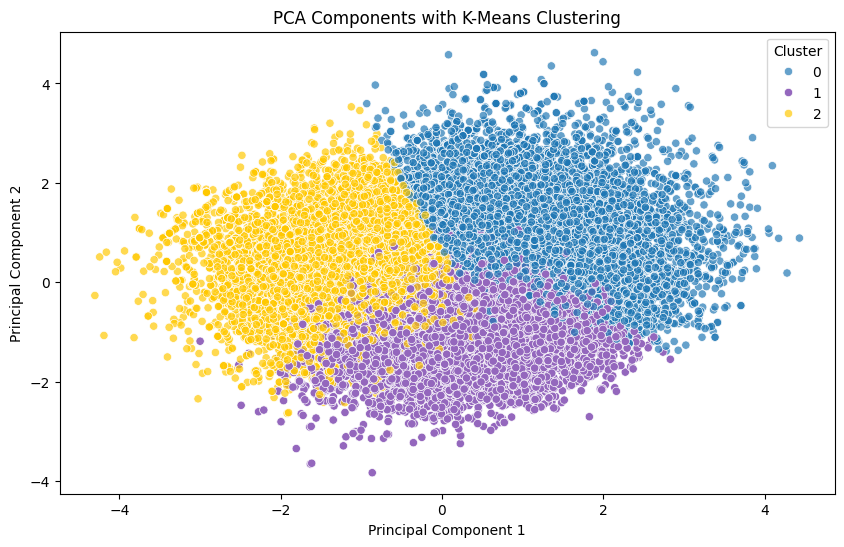

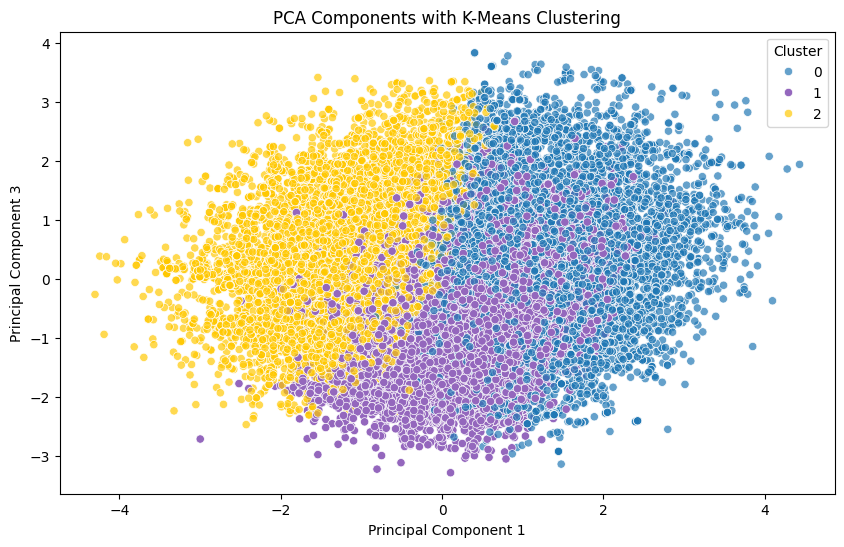

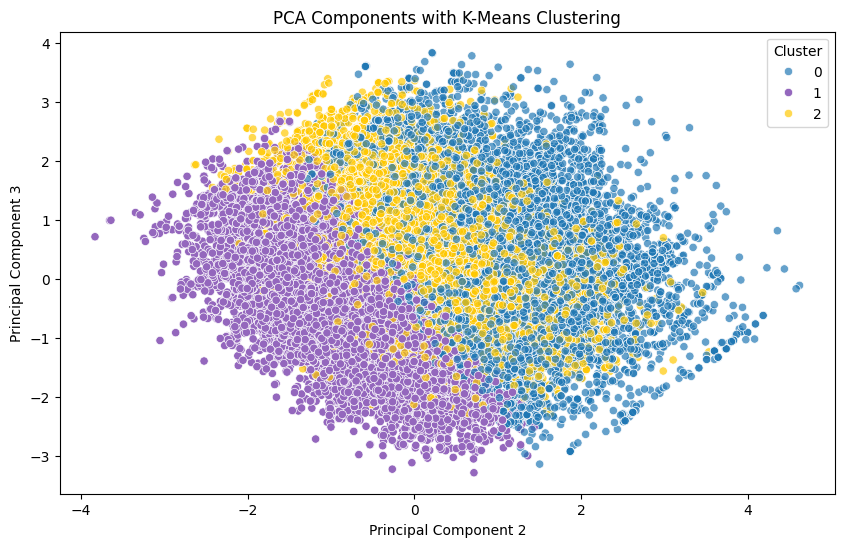

In [16]:

# K-Means clustering with 2 clusters #4
kmeans_2 = KMeans(n_clusters=num_components, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans_2.fit_predict(pca_df)
pca_df['Cluster'] = cluster_labels

# Scatter plot for the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette=custom_palette)
plt.title('PCA Components with K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Scatter plot for the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC3', hue='Cluster', data=pca_df, palette=custom_palette)
plt.title('PCA Components with K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.legend(title='Cluster')
plt.show()

# Scatter plot for the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC2', y='PC3', hue='Cluster', data=pca_df, palette=custom_palette)
plt.title('PCA Components with K-Means Clustering')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.legend(title='Cluster')
plt.show()

In [17]:
columns = ['average_age', 'race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'insulin']

def ordinal_encoder(column):
    # encoding in diabetesMed
    encoder = OrdinalEncoder()
    df[column] = encoder.fit_transform(df[[column]])

def check_any_isna(column):
    print(f"? or NULL in {column} : {len(df[df[column] == '?'])} {df[column].isna().sum()}")
    print(f"Type of  {column}: {df[column].dtype}")

for column in columns:
    ordinal_encoder(column)
    check_any_isna(column)

Type of  average_age: float64
Type of  race: float64
Type of  gender: float64
Type of  admission_type_id: float64
Type of  discharge_disposition_id: float64
Type of  admission_source_id: float64
Type of  time_in_hospital: float64
Type of  num_lab_procedures: float64
Type of  num_procedures: float64
Type of  num_medications: float64
Type of  number_outpatient: float64
Type of  number_emergency: float64
Type of  number_inpatient: float64
Type of  number_diagnoses: float64
Type of  max_glu_serum: float64
Type of  A1Cresult: float64
Type of  metformin: float64
Type of  insulin: float64


In [18]:
df_clustering = df[['average_age', 'race', 'gender', 'admission_type_id',  'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'metformin', 'insulin']].dropna()
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_clustering)
df_standardized

array([[-3.79496847,  0.37578994, -0.9370092 , ..., -3.14904724,
        -0.46623174, -0.49204592],
       [-3.16923296,  0.37578994, -0.9370092 , ...,  0.87412292,
        -0.46623174,  1.99897683],
       [-2.54349746, -1.95867795, -0.9370092 , ..., -0.63456589,
        -0.46623174, -0.49204592],
       ...,
       [-0.04055543,  2.71025782, -0.9370092 , ...,  0.87412292,
        -0.46623174,  0.75346545],
       [ 1.21091558,  0.37578994, -0.9370092 , ...,  0.87412292,
        -0.46623174,  1.99897683],
       [ 0.58518007,  0.37578994,  1.06710215, ...,  0.87412292,
        -0.46623174, -0.49204592]])

In [19]:
len(df_clustering.columns)

14

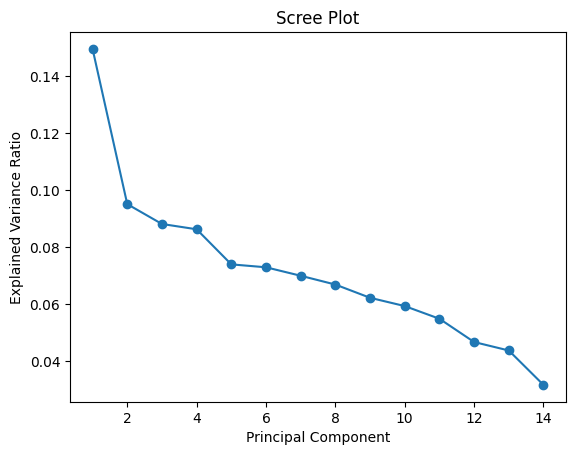

In [20]:
# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(df_standardized)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

In [21]:
# Choose the number of principal components based on the scree plot or cumulative explained variance
num_components = 4

# Retain only the selected number of principal components
pca_result_selected = pca_result[:, :num_components]

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=pca_result_selected, columns=[f'PC{i}' for i in range(1, num_components + 1)])

# Display the DataFrame with principal components
print("DataFrame with Principal Components:")
print(pca_df)

DataFrame with Principal Components:
            PC1       PC2       PC3       PC4
0     -3.752746 -2.519063 -0.154141  2.146424
1     -0.123872  0.083336 -1.792845  1.182564
2     -1.150203 -0.805424 -0.514169  2.485514
3     -0.667387 -0.579572 -0.956848  0.732670
4     -1.806146 -0.162518 -0.823175  0.286828
...         ...       ...       ...       ...
69565  2.675103  0.208636 -0.575385 -0.663731
69566  4.224904 -0.493285 -0.117328  1.239674
69567  1.376293  0.674763  2.238739  1.160718
69568  1.827746  1.886021 -0.502035  0.324947
69569 -0.414268  0.143813  0.664538 -1.351828

[69570 rows x 4 columns]


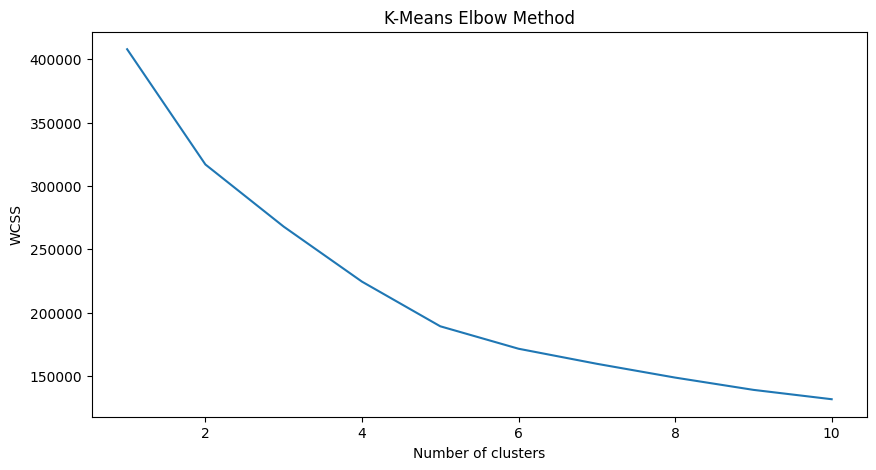

In [22]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('K-Means Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


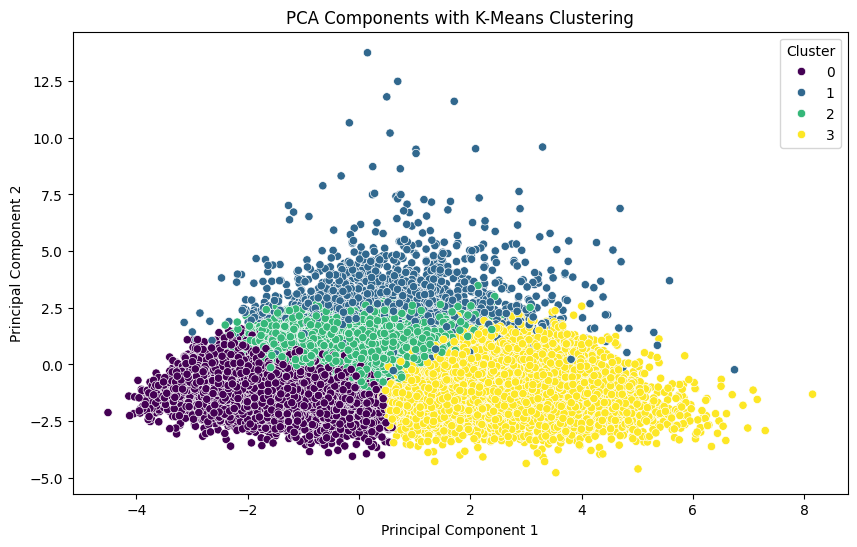

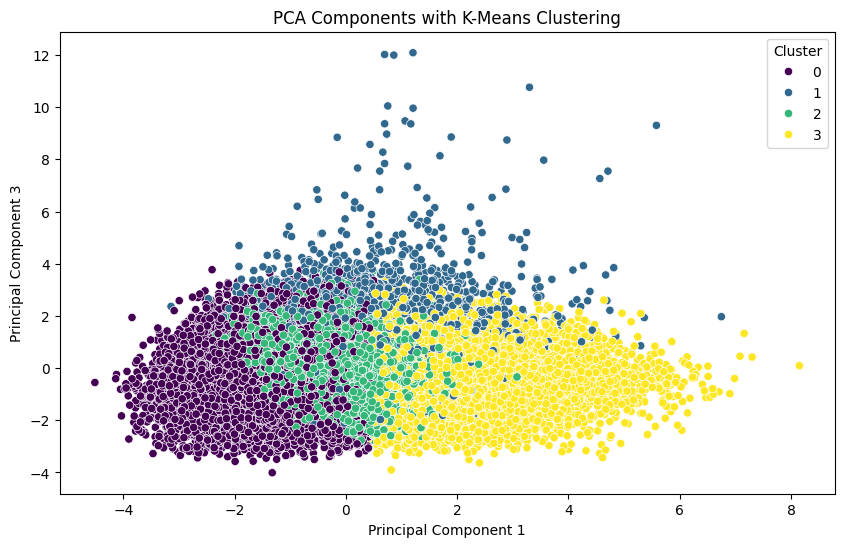

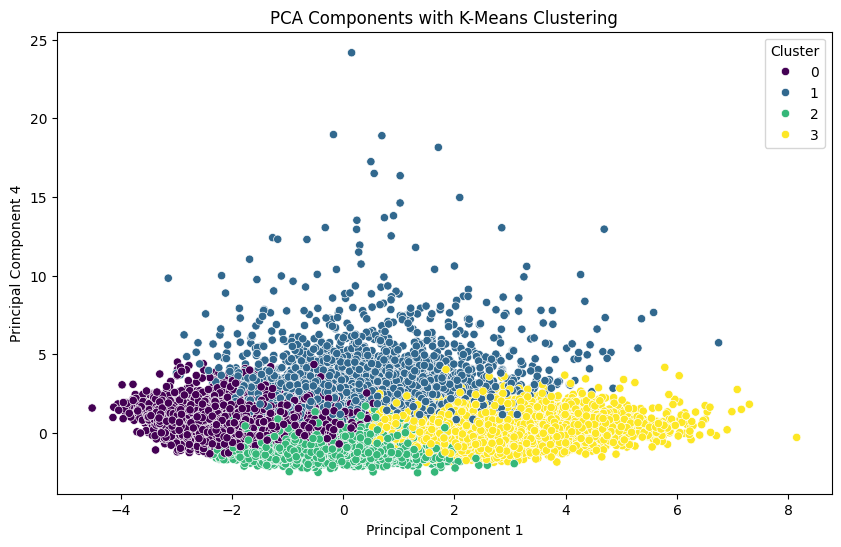

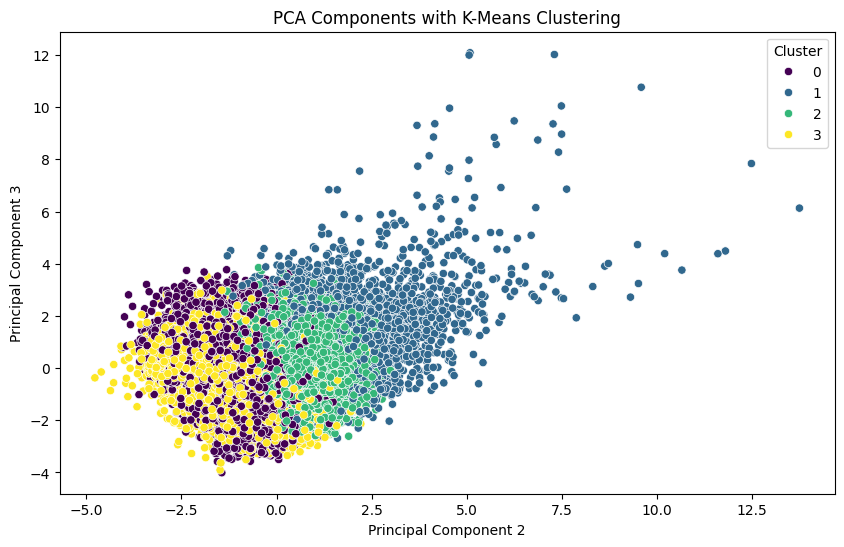

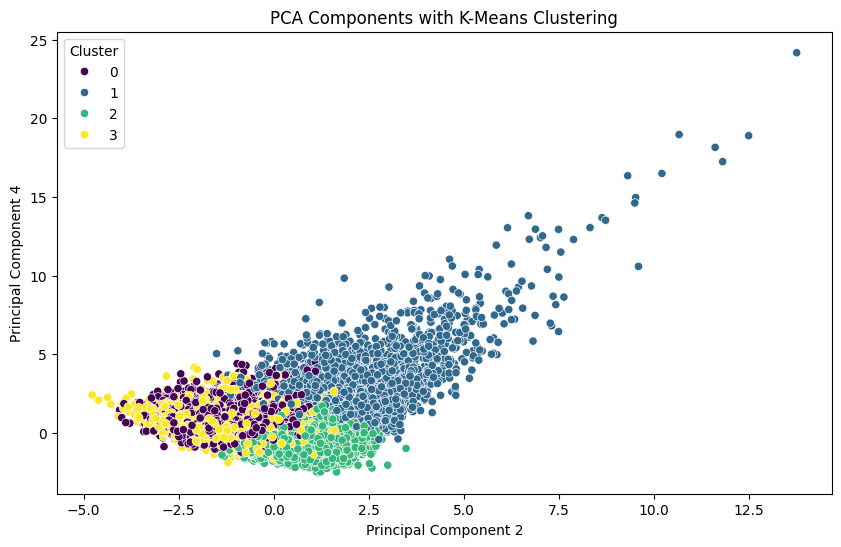

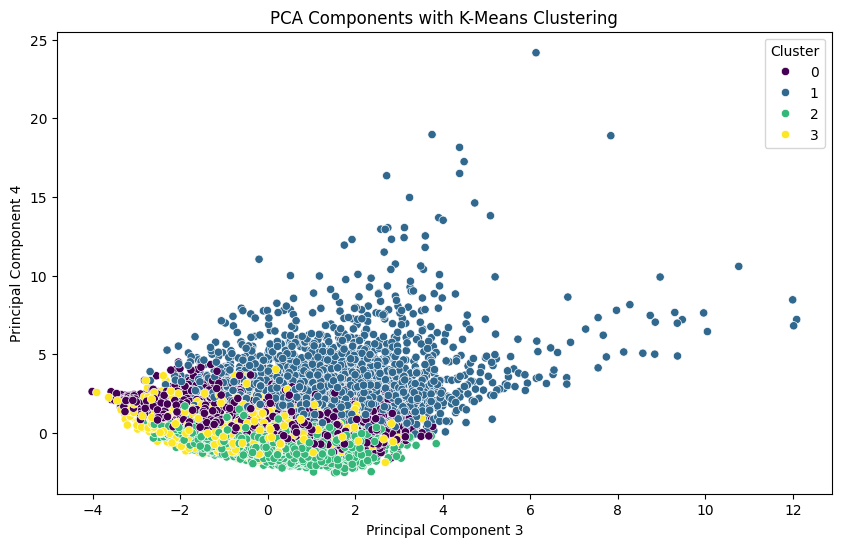

In [38]:

# K-Means clustering with 2 clusters #4
kmeans_2 = KMeans(n_clusters=num_components, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans_2.fit_predict(pca_df)
pca_df['Cluster'] = cluster_labels


# Scatter plot for the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA Components with K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC3', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA Components with K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC4', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA Components with K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 4')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC2', y='PC3', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA Components with K-Means Clustering')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC2', y='PC4', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA Components with K-Means Clustering')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 4')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC3', y='PC4', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA Components with K-Means Clustering')
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.legend(title='Cluster')
plt.show()

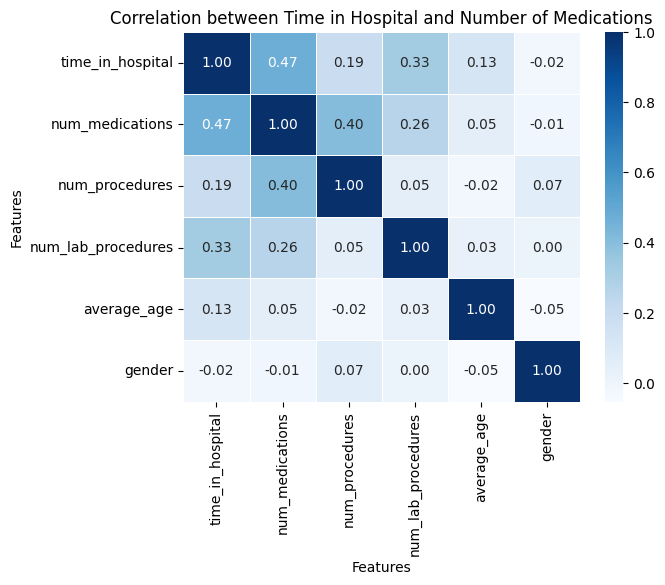

In [44]:
columns = df[['time_in_hospital', 'num_medications', 'num_procedures', 'num_lab_procedures' ,'average_age', 'gender']]

corelation_matrix =columns.corr()

sns.color_palette("Blues", as_cmap=True)

# plt.figure(figsize=(8, 6))
sns.heatmap(corelation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation between Time in Hospital and Number of Medications')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [46]:
df.head(2)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,average_age
0,2278392,8222157,2.0,0.0,[0-10),?,5.0,23.0,0.0,0.0,...,1.0,No,No,No,No,No,No,0.0,NO,0.0
1,149190,55629189,2.0,0.0,[10-20),?,0.0,0.0,6.0,2.0,...,3.0,No,No,No,No,No,Ch,1.0,>30,1.0


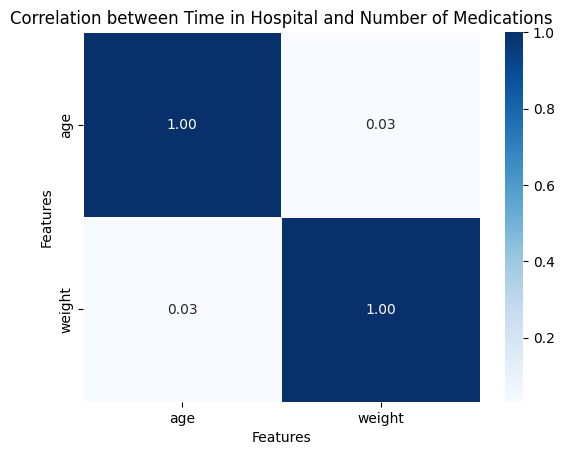

In [59]:

dff = df.copy()

encoder = OrdinalEncoder()
dff['age'] = encoder.fit_transform(df[['age']])
dff['weight'] = encoder.fit_transform(df[['weight']])

columns = dff[['age', 'weight']]
corelation_matrix =columns.corr()

sns.color_palette("Blues", as_cmap=True)

# plt.figure(figsize=(8, 6))
sns.heatmap(corelation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation between Time in Hospital and Number of Medications')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [65]:
daa = df.copy()
len(daa[daa['weight'] != '?'])

2718